In [1]:
# ============================================================
# 01_data_exploration.ipynb
# Exploration du dataset - Classification des fleurs (5 classes)
# Auteur : Aimad Oufares
# ============================================================

# ------------------------------------------------------------
# 1. Imports
# ------------------------------------------------------------
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# ------------------------------------------------------------
# 1. Configuration des chemins
# ------------------------------------------------------------

DATASET_PATH = "../data/flower_images"

classes = os.listdir(DATASET_PATH)
print("Classes détectées :", classes)


Classes détectées : ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']


Lilly : 1000 images
Lotus : 1000 images
Orchid : 1000 images
Sunflower : 1000 images
Tulip : 1000 images


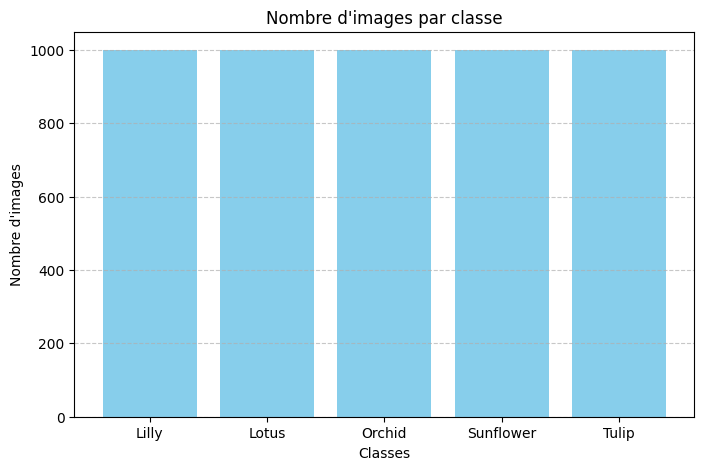

In [4]:
# ------------------------------------------------------------
# 3. Nombre d’images par classe + graphique
# ------------------------------------------------------------
counts = [len(os.listdir(os.path.join(DATASET_PATH, cls))) for cls in classes]

for cls, count in zip(classes, counts):
    print(f"{cls} : {count} images")

# Graphique
plt.figure(figsize=(8,5))
plt.bar(classes, counts, color='skyblue')
plt.title("Nombre d'images par classe")
plt.ylabel("Nombre d'images")
plt.xlabel("Classes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


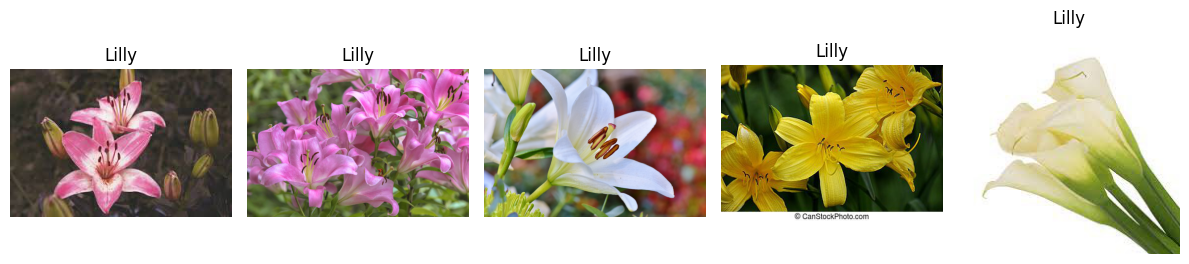

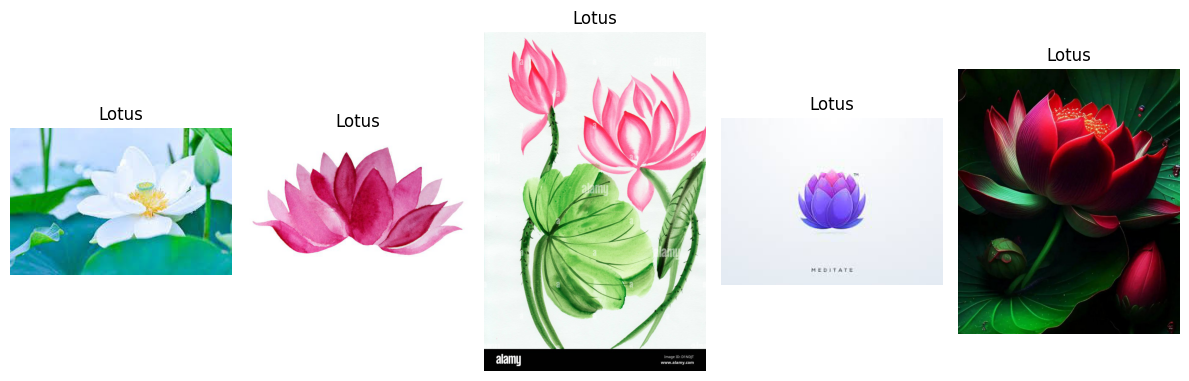

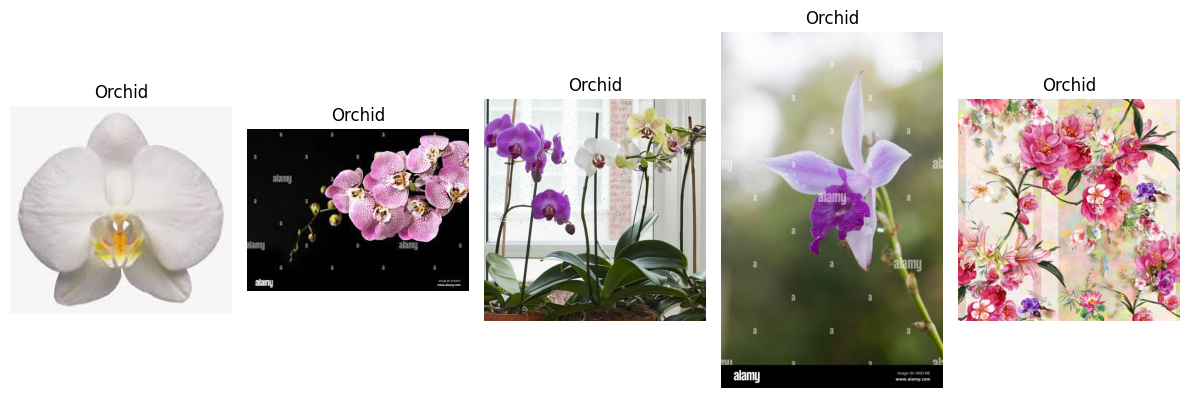

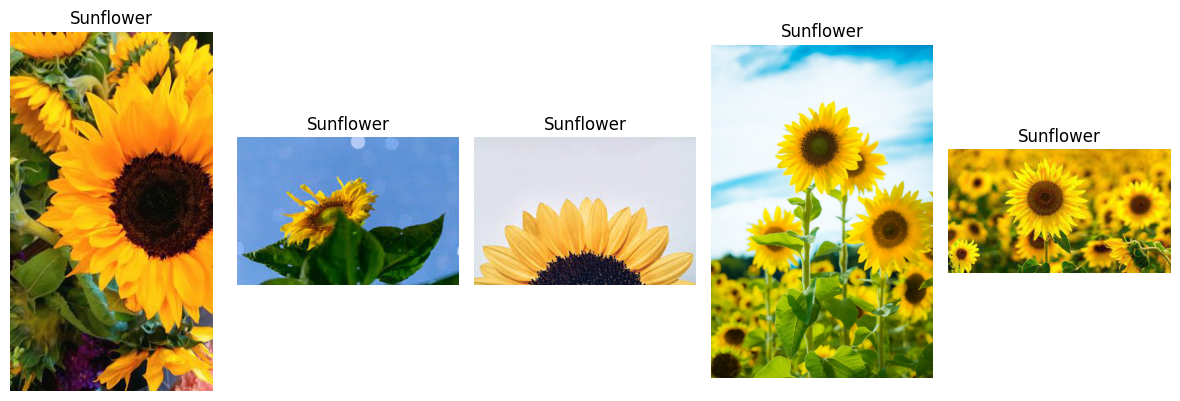

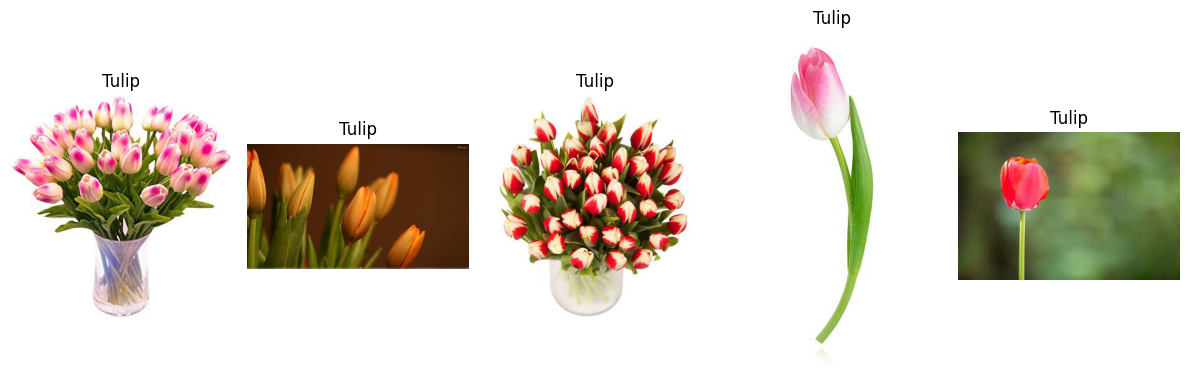

In [5]:
# ------------------------------------------------------------
# 4. Visualisation de quelques images par classe
# ------------------------------------------------------------
def show_samples(class_name, n=5):
    path = os.path.join(DATASET_PATH, class_name)
    images = os.listdir(path)[:n]
    
    plt.figure(figsize=(12, 4))
    for i, img_name in enumerate(images):
        try:
            img = plt.imread(os.path.join(path, img_name))
            plt.subplot(1, n, i+1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')
        except Exception as e:
            print(f"Impossible de charger {img_name} : {e}")
    plt.tight_layout()
    plt.show()

for cls in classes:
    show_samples(cls, n=5)
    

In [6]:
# ------------------------------------------------------------
# 5. Préparation des générateurs d’images avec augmentation
# ------------------------------------------------------------
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1
)

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical',
    shuffle=False
)

print("Classes indexées :", train_generator.class_indices)


Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Classes indexées : {'Lilly': 0, 'Lotus': 1, 'Orchid': 2, 'Sunflower': 3, 'Tulip': 4}


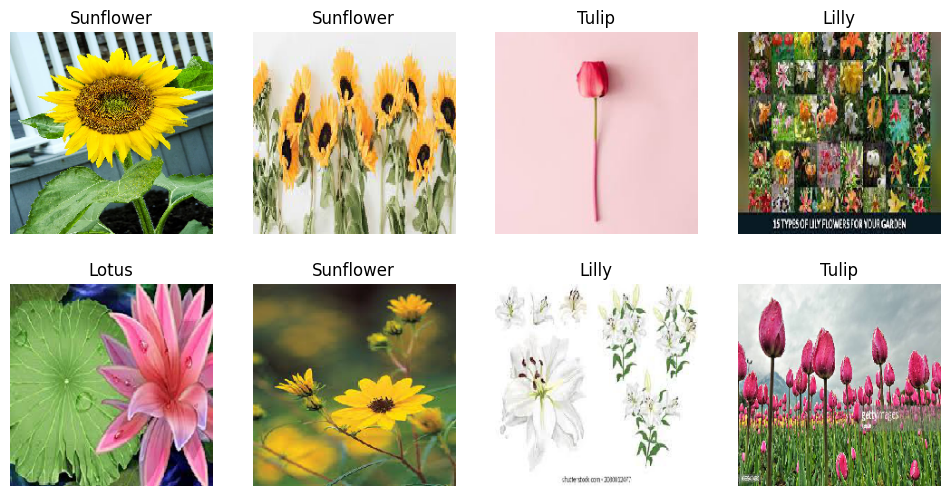

In [15]:
# ------------------------------------------------------------
# 5. Visualisation d’un batch prétraité
# ------------------------------------------------------------

sample_images, sample_labels = next(train_generator)

plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(sample_images[i])
    label = list(train_generator.class_indices.keys())[np.argmax(sample_labels[i])]
    plt.title(label)
    plt.axis('off')

plt.show()
